In [172]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from matplotlib.path import get_path_collection_extents
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook as tqdm
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import gridspec 
from sklearn.base import TransformerMixin

In [173]:
dfold = pd.read_csv('Vitrina_NEW_ITOG.csv', sep=';', encoding='utf-8-sig') #read our ABT

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (35,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [174]:
dfold.drop(['ID',
 'СредняяМаржа ТЕСТ',
 'СредняяМаржаВсе ТЕСТ',
 'Доля выкупленных ТЕСТ',
 'ДЕТСКОЕ ПИТАНИЕ ТЕСТ',
 'ЖЕНСКИЕ ШТУЧКИ ТЕСТ',
 'ИГРУШКИ ТЕСТ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ ТЕСТ',
 'КОСМЕТИКА/ГИГИЕНА ТЕСТ',
 'КРУПНОГАБАРИТНЫЙ ТОВАР ТЕСТ',
 'ОБУВЬ ТЕСТ',
 'ПОДГУЗНИКИ ТЕСТ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ ТЕСТ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ ТЕСТ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА ТЕСТ',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ ТЕСТ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ ТЕСТ',
 'ИГРУШКИ ТЕСТ.1',
 'ИНОЕ ТЕСТ',
 'КГТ ТЕСТ',
 'ОДЕЖДА ТЕСТ',
 'ППКП ТЕСТ',
 'Курьерская ТЕСТ',
 'Магазины ТЕСТ',
 'Самовывоз ТЕСТ',
 'Транспортная компания ТЕСТ',
 'DPD ТЕСТ',
 'Pick point ТЕСТ',
 'Не указан способ доставки ТЕСТ',
 'Безналичная ТЕСТ',
 'Наличная ТЕСТ',
 'Не указан способ оплаты ТЕСТ',
 'МО ТЕСТ',
 'Москва ТЕСТ',
 'Регионы ТЕСТ',], axis=1, inplace=True)

In [175]:
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



In [176]:
dfold = DataFrameImputer().fit_transform(dfold)

In [177]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfold)

In [178]:
df = pd.DataFrame(scaled_data)
df.columns = ['КоличествоЧеков',
 'Среднийчек',
 'СреднееЧислоТоваровЧека',
 'Выручка',
 'КоличествоТоваров',
 'ВыручкаВсе',
 'КоличествоТоваровВсе',
 'ПроцентОтмен (в процентах)',
 'Доля выкупленных',
 'ДЕТСКОЕ ПИТАНИЕ',
 'ЖЕНСКИЕ ШТУЧКИ',
 'ИГРУШКИ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ',
 'КОСМЕТИКА/ГИГИЕНА',
 'КРУПНОГАБАРИТНЫЙ ТОВАР',
 'ОБУВЬ',
 'ПОДГУЗНИКИ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ',
 'ИГРУШКИ.1',
 'ИНОЕ',
 'КГТ',
 'ОДЕЖДА',
 'ППКП',
 'Курьерская',
 'Магазины',
 'Самовывоз',
 'DPD',
 'Pick point',
 'Безналичная',
 'Наличная',
 'МО',
 'Москва',
 'Регионы',
 'СредняяМаржа',
 'СредняяМаржаВсе']

## CORELLATION 

Here we will create correlation table based on the Pearson correlation matrix.

In [179]:
df.corr()

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,Самовывоз,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе
КоличествоЧеков,1.000000,-0.029916,0.083896,0.330264,0.525231,0.340616,0.502513,0.871217,-0.052437,0.130092,...,0.020263,0.001928,-0.003928,-0.013201,0.013201,0.053831,0.011592,-0.045795,0.012256,0.006574
Среднийчек,-0.029916,1.000000,0.076685,0.858843,0.046896,0.810351,0.041154,-0.029073,0.018654,-0.014014,...,-0.011082,0.006096,0.009695,0.012243,-0.012243,-0.032964,-0.118684,0.129939,0.483604,0.455453
СреднееЧислоТоваровЧека,0.083896,0.076685,1.000000,0.110018,0.789975,0.120832,0.716877,0.102096,-0.018967,0.225364,...,0.000754,0.007106,0.009804,-0.011499,0.011499,0.030128,0.019561,-0.037568,0.010447,0.006513
Выручка,0.330264,0.858843,0.110018,1.000000,0.258235,0.956524,0.244149,0.285149,-0.003356,0.045876,...,-0.002039,0.006971,0.007288,0.004934,-0.004934,-0.014420,-0.099659,0.100438,0.421894,0.395344
КоличествоТоваров,0.525231,0.046896,0.789975,0.258235,1.000000,0.271967,0.919853,0.481117,-0.035590,0.240757,...,0.008418,0.006675,0.004525,-0.014665,0.014665,0.045238,0.018624,-0.046596,0.008492,0.003276
ВыручкаВсе,0.340616,0.810351,0.120832,0.956524,0.271967,1.000000,0.330143,0.392346,-0.179545,0.053328,...,0.036015,0.031030,0.029597,-0.104946,0.104946,-0.009477,-0.080933,0.080104,0.397632,0.376421
КоличествоТоваровВсе,0.502513,0.041154,0.716877,0.244149,0.919853,0.330143,1.000000,0.597599,-0.284481,0.221487,...,0.060203,0.032097,0.033553,-0.149235,0.149235,0.045380,0.031429,-0.058382,0.006547,0.002911
ПроцентОтмен (в процентах),0.871217,-0.029073,0.102096,0.285149,0.481117,0.392346,0.597599,1.000000,-0.428194,0.119597,...,0.184205,0.022554,0.037794,-0.230657,0.230657,0.046823,0.020450,-0.049299,0.007039,0.004040
Доля выкупленных,-0.052437,0.018654,-0.018967,-0.003356,-0.035590,-0.179545,-0.284481,-0.428194,1.000000,-0.025355,...,-0.339436,-0.057242,-0.112504,0.554179,-0.554179,-0.011196,-0.043178,0.046752,0.012938,-0.008447
ДЕТСКОЕ ПИТАНИЕ,0.130092,-0.014014,0.225364,0.045876,0.240757,0.053328,0.221487,0.119597,-0.025355,1.000000,...,0.020848,0.003899,0.011247,-0.037186,0.037186,0.018009,0.044339,-0.052268,-0.040202,-0.034218


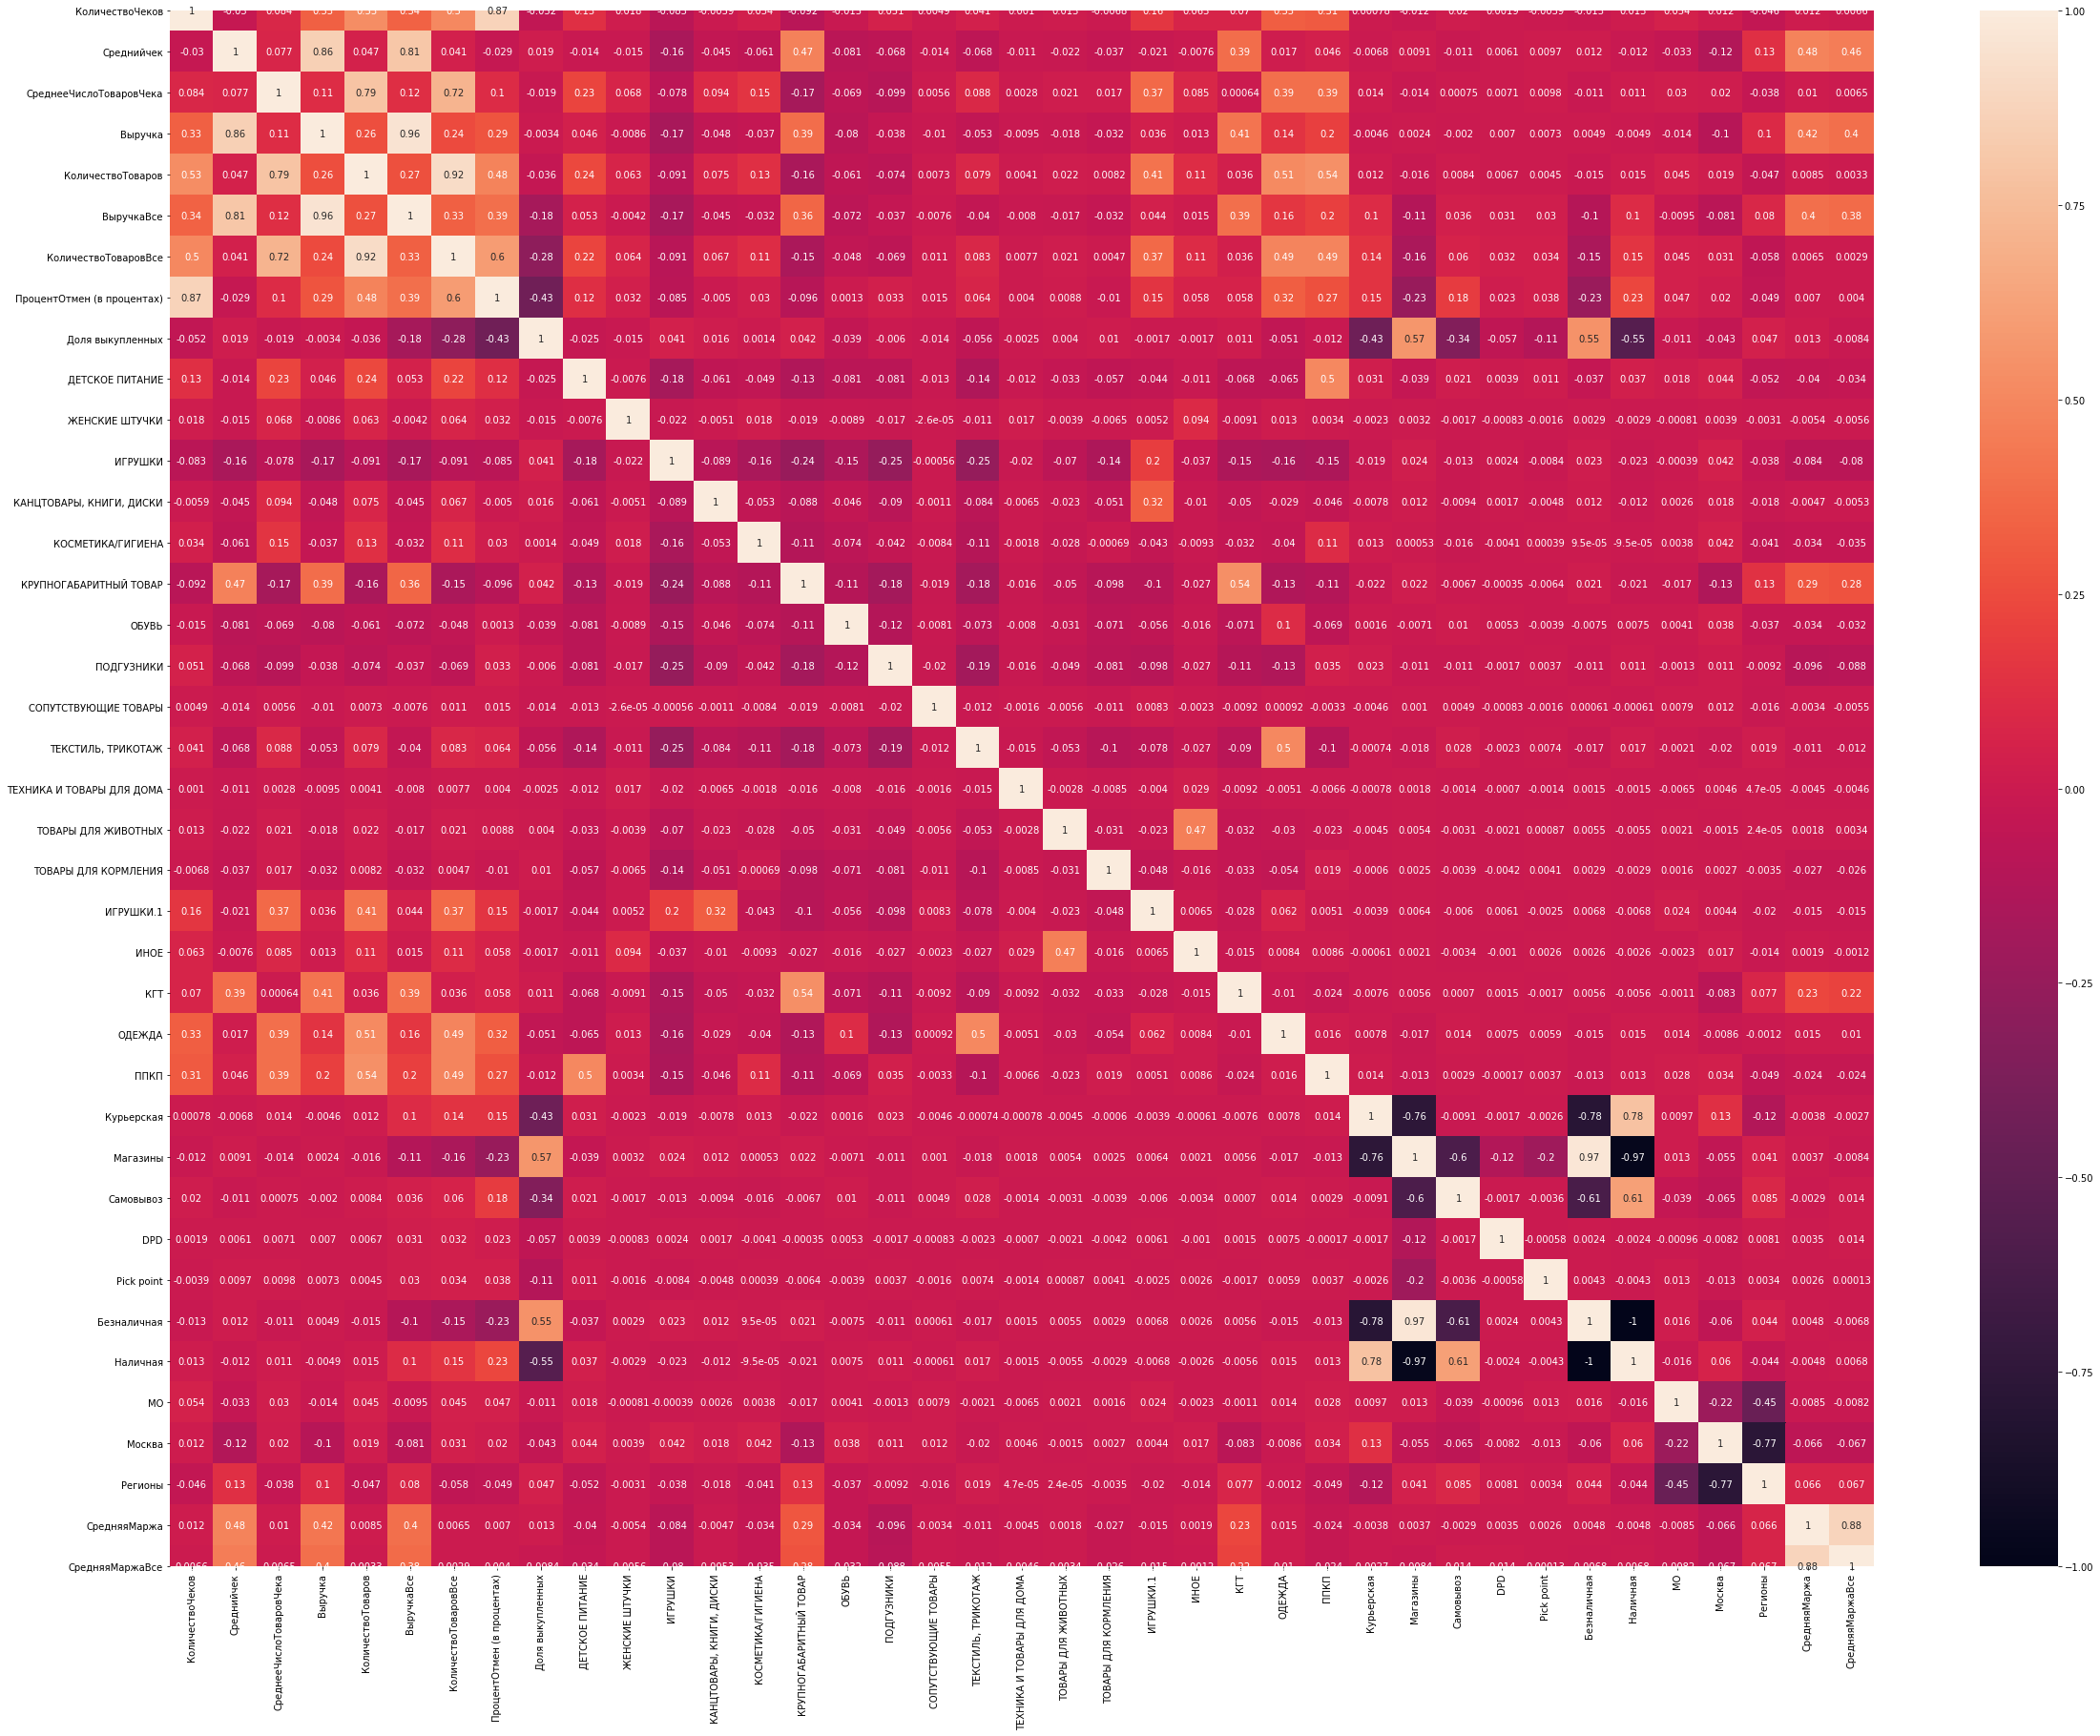

In [180]:
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True)
plt.show()

The figure represents relationship-correlation between each variable in the data. The grading on the right shows how much the variables correlate by a rule: the lighter the color, the stronger the correlation. On the diagonal, we see only white squares-intersections as it is the dependence of the variable on itself (the correlation is equal to 1)

In [181]:
def get_corr_cols(df, treshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > treshold)]
    return to_drop

def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson', min_periods=1) 
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index 
    df_out = df_in[un_corr_idx] 
    return df_out

Next, we create a function that will remove highly correlated objects (we chose the maximum correlation value of 60%).

In [182]:
data_drop_corr = trimm_correlated(df, 0.6)

In [183]:
data_drop_corr.columns

Index(['КоличествоЧеков', 'Среднийчек', 'СреднееЧислоТоваровЧека',
       'Доля выкупленных', 'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ.1', 'ИНОЕ',
       'КГТ', 'ОДЕЖДА', 'ППКП', 'Курьерская', 'Самовывоз', 'DPD', 'Pick point',
       'МО', 'Москва', 'СредняяМаржа'],
      dtype='object')

In [184]:
df = data_drop_corr.values

In [185]:
df = pd.DataFrame(df)

In [186]:
df.columns = ['КоличествоЧеков', 'Среднийчек', 'СреднееЧислоТоваровЧека',
       'Доля выкупленных', 'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ.1', 'ИНОЕ',
       'КГТ', 'ОДЕЖДА', 'ППКП', 'Курьерская', 'Самовывоз', 'DPD', 'Pick point',
       'МО', 'Москва', 'СредняяМаржа']

In [187]:
df

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,...,КГТ,ОДЕЖДА,ППКП,Курьерская,Самовывоз,DPD,Pick point,МО,Москва,СредняяМаржа
0,-0.374726,0.433831,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,1.604753,-0.626182
1,-0.374726,-0.483095,-0.253015,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,0.651866,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.182253
2,-0.374726,-0.427666,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.387920
3,-0.374726,-0.646490,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.190116,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,1.604753,-0.292891
4,-0.374726,3.090445,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,2.572573,...,0.949241,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,1.738531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,-0.374726,-0.260932,0.258226,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,0.161898,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.132673
65924,-0.374726,-0.616215,-0.508635,0.265702,-0.321454,-0.048565,1.867113,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,-0.372173,-0.630796,-0.273610
65925,-0.374726,0.679591,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,-0.422241,...,-0.296188,-0.348636,-0.190116,-0.101616,-0.1145,-0.017191,-0.033592,2.748996,-0.630796,-0.040857
65926,-0.374726,1.741213,-0.508635,0.265702,-0.321454,-0.048565,-0.616511,-0.217909,-0.306175,2.572573,...,0.949241,-0.348636,-0.278120,-0.101616,-0.1145,-0.017191,-0.033592,2.748996,-0.630796,0.863068


# Choose eps

We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. The point itself is included in n_neighbors. The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points. It will be done to estimate the eps value.


In [188]:
epscheck = pd.read_csv('Книга1.csv', sep=';', encoding='utf-8-sig') 

In [189]:
epscheck.drop(['ID',
 'СредняяМаржаВсе ТЕСТ',
 'Доля выкупленных ТЕСТ',
 'ДЕТСКОЕ ПИТАНИЕ ТЕСТ',
 'ЖЕНСКИЕ ШТУЧКИ ТЕСТ',
 'ИГРУШКИ ТЕСТ',
 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ ТЕСТ',
 'КОСМЕТИКА/ГИГИЕНА ТЕСТ',
 'КРУПНОГАБАРИТНЫЙ ТОВАР ТЕСТ',
 'ОБУВЬ ТЕСТ',
 'ПОДГУЗНИКИ ТЕСТ',
 'СОПУТСТВУЮЩИЕ ТОВАРЫ ТЕСТ',
 'ТЕКСТИЛЬ, ТРИКОТАЖ ТЕСТ',
 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА ТЕСТ',
 'ТОВАРЫ ДЛЯ ЖИВОТНЫХ ТЕСТ',
 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ ТЕСТ',
 'ИГРУШКИ ТЕСТ.1',
 'ИНОЕ ТЕСТ',
 'КГТ ТЕСТ',
 'ОДЕЖДА ТЕСТ',
 'ППКП ТЕСТ',
 'Курьерская ТЕСТ',
 'Магазины ТЕСТ',
 'Самовывоз ТЕСТ',
 'Транспортная компания ТЕСТ',
 'DPD ТЕСТ',
 'Pick point ТЕСТ',
 'Не указан способ доставки ТЕСТ',
 'Безналичная ТЕСТ',
 'Наличная ТЕСТ',
 'Не указан способ оплаты ТЕСТ',
 'МО ТЕСТ',
 'Москва ТЕСТ',
 'Регионы ТЕСТ',], axis=1, inplace=True)

In [192]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [193]:
X_scaled

array([[-0.37472622,  0.43383073, -0.50863485, ..., -0.37217254,
         1.60475345, -0.62618207],
       [-0.37472622, -0.48309524, -0.25301466, ..., -0.37217254,
        -0.63079644, -0.1822532 ],
       [-0.37472622, -0.42766562, -0.50863485, ..., -0.37217254,
        -0.63079644, -0.38792035],
       ...,
       [-0.37472622,  0.67959093, -0.50863485, ...,  2.74899602,
        -0.63079644, -0.04085704],
       [-0.37472622,  1.74121267, -0.50863485, ...,  2.74899602,
        -0.63079644,  0.86306845],
       [-0.37472622, -0.56056312, -0.50863485, ...,  2.74899602,
        -0.63079644, -0.23183368]])

In [194]:
neigh = NearestNeighbors(n_neighbors=4)

In [195]:
nbrs = neigh.fit(X_scaled)

In [196]:
distances, indices = nbrs.kneighbors(X_scaled)

Sort the obtained values in ascending order and display them on the screen. We see something like this sharply increasing chart. We should take ϵ somewhere in the band where the strongest kink occurs. The more ϵ, the more clusters we get, and the fewer there will be.

In [197]:
distances = np.sort(distances, axis=0)

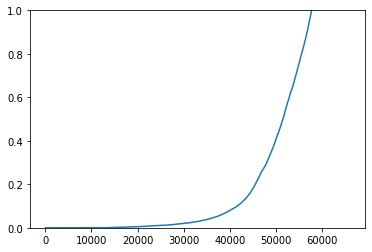

In [198]:
distances = distances[:,1]
plt.gca().set_ylim(0, 1)
plt.plot(distances)

Calculate the average distance by m of the closest neighbors for each point. That is, if m = 4, you need to select the three nearest neighbors, add the distances to them and divide by four. The optimal value for epsilon will be found at the point of maximum curvature.

I worked with 5 % of all dataframe. It show that optimal value of eps could be from 0.25-0.35. Look at the graph. 

# DBSCAN

In [199]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [200]:
db = DBSCAN(eps=0.35, min_samples=3).fit(X_scaled) #10

In [201]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

The labels_ property contains the list of clusters and their respective points.

In [202]:
labels = db.labels_

The model classified the densely populated areas. As we can see, all the dark blue points were categorized as noise.

In [203]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [204]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 20


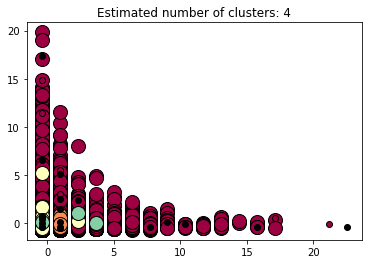

In [205]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [206]:
df = pd.DataFrame(df)

In [207]:
labels = pd.DataFrame(db.labels_)
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
65923,0
65924,0
65925,0
65926,0


In [208]:
dfold['Кластер'] = labels

In [209]:
dfold

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе,Кластер
0,1,5215,1,5166,1,5166,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-705.0,-705.0,0
1,1,1096,2,997,2,997,2,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,262.0,262.0,0
2,1,1345,1,1345,1,1345,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-186.0,-186.0,0
3,1,362,1,313,1,313,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,21.0,21.0,0
4,1,17149,1,17000,1,17000,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4446.0,4446.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65923,1,2094,4,1995,4,1995,4,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,370.0,370.0,0
65924,1,498,1,399,1,399,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,63.0,63.0,0
65925,1,6319,1,6270,1,6270,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,570.0,570.0,0
65926,1,11088,1,10989,1,10989,1,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2539.0,2539.0,0


In [210]:
dfold.to_csv('final_clustersDBSCAN.csv', index=False, sep=';', encoding='utf-8-sig')

In [211]:
means = dfold.groupby('Кластер').mean()

In [212]:
means

,КоличествоЧеков,Среднийчек,СреднееЧислоТоваровЧека,Выручка,КоличествоТоваров,ВыручкаВсе,КоличествоТоваровВсе,ПроцентОтмен (в процентах),Доля выкупленных,ДЕТСКОЕ ПИТАНИЕ,...,Самовывоз,DPD,Pick point,Безналичная,Наличная,МО,Москва,Регионы,СредняяМаржа,СредняяМаржаВсе
Кластер,,,,,,,,,,,,,,,,,,,,,
-1,3.900000,10968.450000,19.700000,19700.450000,46.900000,25121.800000,57.100000,5.450000,0.793183,0.196783,...,0.003431,0.012500,0.023684,0.863852,0.136148,0.103447,0.246553,0.650000,6471.038965,2097.966052
0,1.277787,3262.962768,2.984033,3882.243879,4.043409,4171.975017,4.524034,1.390119,0.961915,0.077170,...,0.005961,0.000008,0.000596,0.987352,0.012648,0.119257,0.282215,0.598528,657.026723,667.662154
1,1.307692,4169.461538,3.538462,5327.692308,4.461538,14199.307692,16.769231,2.538462,0.428449,0.083686,...,0.000000,0.709236,0.000000,1.000000,0.000000,0.059829,0.094017,0.846154,1069.038462,1216.621795
2,1.285714,8838.142857,6.142857,9966.142857,8.142857,19419.857143,13.428571,2.428571,0.668421,0.342262,...,0.003968,0.336508,0.000000,0.996032,0.003968,0.178571,0.107143,0.714286,1749.619048,7857.442857
3,2.666667,5056.000000,8.666667,13139.666667,16.000000,13139.666667,16.000000,2.666667,1.000000,0.001650,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.666667,0.333333,881.694444,881.694444


In [213]:
means.to_csv('сводКластерDBSCAN.csv', index=False, sep=';', encoding='utf-8-sig')

# OPTICS

In [34]:
# Building the OPTICS Clustering model 
optics_model = OPTICS(min_samples = 3, xi = 0.05, min_cluster_size = 0.05) 
  
# Training the model 
optics_model.fit(X_scaled) 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=3, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [37]:
# Producing the labels according to the DBSCAN technique with eps = 0.35
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 0.35) 
  
# Producing the labels according to the DBSCAN technique with eps = 5.0
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                   core_distances = optics_model.core_distances_, 
                                   ordering = optics_model.ordering_, eps = 5) 
  
# Creating a numpy array with numbers at equal spaces till 
# the specified range 
space = np.arange(len(X_scaled)) 
  
# Storing the reachability distance of each point 
reachability = optics_model.reachability_[optics_model.ordering_] 
  
# Storing the cluster labels of each point 
labels = optics_model.labels_[optics_model.ordering_] 
  
print(labels) 

[ 0  0  0 ... -1 -1 -1]


In [43]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['КоличествоЧеков', 'Среднийчек', 'СреднееЧислоТоваровЧека',
       'Доля выкупленных', 'ДЕТСКОЕ ПИТАНИЕ', 'ЖЕНСКИЕ ШТУЧКИ', 'ИГРУШКИ',
       'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'КОСМЕТИКА/ГИГИЕНА',
       'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ОБУВЬ', 'ПОДГУЗНИКИ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ',
       'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ.1', 'ИНОЕ',
       'КГТ', 'ОДЕЖДА', 'ППКП', 'Курьерская', 'Самовывоз', 'DPD', 'Pick point',
       'МО', 'Москва', 'СредняяМаржа']

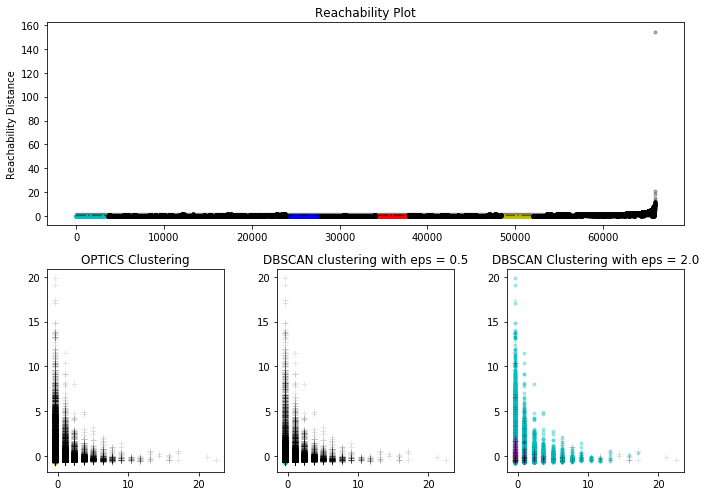

In [44]:
# Defining the framework of the visualization 
plt.figure(figsize =(10, 7)) 
G = gridspec.GridSpec(2, 3) 
ax1 = plt.subplot(G[0, :]) 
ax2 = plt.subplot(G[1, 0]) 
ax3 = plt.subplot(G[1, 1]) 
ax4 = plt.subplot(G[1, 2]) 
  
# Plotting the Reachability-Distance Plot 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = space[labels == Class] 
    Rk = reachability[labels == Class] 
    ax1.plot(Xk, Rk, colour, alpha = 0.3) 
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3) 
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5) 
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5) 
ax1.set_ylabel('Reachability Distance') 
ax1.set_title('Reachability Plot') 
  
# Plotting the OPTICS Clustering 
colors = ['c.', 'b.', 'r.', 'y.', 'g.'] 
for Class, colour in zip(range(0, 5), colors): 
    Xk = X_scaled[optics_model.labels_ == Class] 
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
      
ax2.plot(X_scaled.iloc[optics_model.labels_ == -1, 0], 
        X_scaled.iloc[optics_model.labels_ == -1, 1], 
       'k+', alpha = 0.1) 
ax2.set_title('OPTICS Clustering') 
  
# Plotting the DBSCAN Clustering with eps = 0.5 
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow'] 
for Class, colour in zip(range(0, 6), colors): 
    Xk = X_scaled[labels1 == Class] 
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.') 
        
ax3.plot(X_scaled.iloc[labels1 == -1, 0], 
        X_scaled.iloc[labels1 == -1, 1], 
       'k+', alpha = 0.1) 
ax3.set_title('DBSCAN clustering with eps = 0.5') 
  
# Plotting the DBSCAN Clustering with eps = 2.0 
colors = ['c.', 'y.', 'm.', 'g.'] 
for Class, colour in zip(range(0, 4), colors): 
    Xk = X_scaled.iloc[labels2 == Class] 
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3) 
          
ax4.plot(X_scaled.iloc[labels2 == -1, 0], 
        X_scaled.iloc[labels2 == -1, 1], 
       'k+', alpha = 0.1) 
ax4.set_title('DBSCAN Clustering with eps = 2.0') 
  
  
plt.tight_layout() 
plt.show() 